In [1]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 20.2 MB/s eta 0:00:00


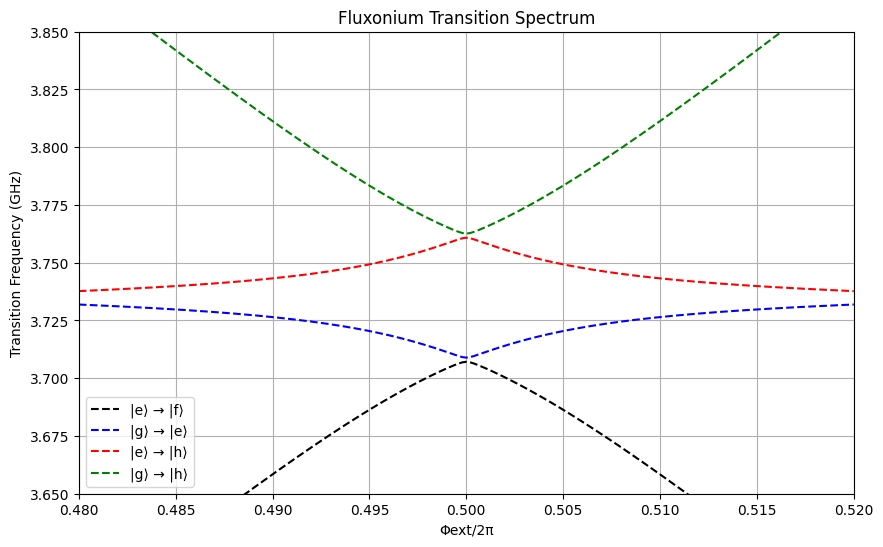

In [22]:
# Rayan Trabelsi

import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

EJ = 5.178
EC = 0.4144
EL = 0.18

N = 50

# operators
a = qt.destroy(N)
phi = (a + a.dag()) / np.sqrt(2)
n = (a - a.dag()) * 1j / np.sqrt(2)

phi_ext = np.linspace(0.48, 0.52, 201) * 2 * np.pi


energies = np.zeros((len(phi_ext), 4)) # we store here the eigenvalues

for idx, flux in enumerate(phi_ext):

    H = -EJ * (phi - flux).cosm() + 4 * EC * n**2 + (EL/2) * phi**2

    eigenvals = H.eigenenergies(eigvals=4)

    energies[idx] = eigenvals



transitions = np.zeros((len(phi_ext), 4))
transitions[:, 0] = energies[:, 2] - energies[:, 1]  # |e⟩ → |f⟩
transitions[:, 1] = energies[:, 2] - energies[:, 0]  # |g⟩ → |e⟩
transitions[:, 2] = energies[:, 3] - energies[:, 1]  # |e⟩ → |h⟩
transitions[:, 3] = energies[:, 3] - energies[:, 0]  # |g⟩ → |h⟩

plt.figure(figsize=(10, 6))
plt.plot(phi_ext/(2*np.pi), transitions[:, 0], 'k--', label='|e⟩ → |f⟩')
plt.plot(phi_ext/(2*np.pi), transitions[:, 1], 'b--', label='|g⟩ → |e⟩')
plt.plot(phi_ext/(2*np.pi), transitions[:, 2], 'r--', label='|e⟩ → |h⟩')
plt.plot(phi_ext/(2*np.pi), transitions[:, 3], 'g--', label='|g⟩ → |h⟩')

plt.xlabel('Φext/2π')
plt.ylabel('Transition Frequency (GHz)')
plt.title('Fluxonium Transition Spectrum')
plt.legend()
plt.grid(True)
plt.xlim(0.48, 0.52)
plt.ylim(3.65, 3.85)
plt.show()